# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

##### Note on data:
This project will focus on the two main windows of years: (2003, 2007, 2016) and (2008-2012). The first list will be used for analysis of crime over time, as this is the beginning, middle, and end of our dataset. The second list will be used for analysis of crime with respect to income, as our income dataset is only based on that date range.

### Setup

In [2]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

### Plot settings

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = (25, 10) #increase figure size

In [8]:
# Load all datasets
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_csv("data/crime_2008.csv")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_csv("data/crime_2009.csv")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_csv("data/crime_2010.csv")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_csv("data/crime_2011.csv")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_csv("data/crime_2012.csv")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"


datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

/anaconda/envs/cogs108/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Size

In [ ]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

### Missingness

In [ ]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

### Set date as index

In [9]:
for dataset in datasets:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

for dataset in datasets_by_area:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.set_index('Date', inplace=True)
    dataset.sort_index(inplace=True)
    print(dataset.name, "done")

Crime in 2003 done
Crime in 2007 done
Crime in 2016 done
Crime in 2008 done
Crime in 2009 done
Crime in 2010 done
Crime in 2011 done
Crime in 2012 done


### Remove rows with missing values

In [10]:
for dataset in datasets:
    dataset.dropna(inplace=True)
    
for dataset in datasets_by_area:
    dataset.dropna(inplace=True)

### Remove unnecessary columns

In [11]:
for dataset in datasets:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

for dataset in datasets_by_area:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

### Pickle dataframes for easier loading

In [12]:
for dataset in datasets:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

for dataset in datasets_by_area:
    dataset.to_pickle("./data/crime_" + dataset.year + ".pkl")

### Load pickles to bypass data loading/formatting

In [97]:
df_2003 = pd.read_pickle("./data/crime_2003.pkl")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_pickle("./data/crime_2007.pkl")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_pickle("./data/crime_2016.pkl")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_pickle("./data/crime_2008.pkl")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_pickle("./data/crime_2009.pkl")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_pickle("./data/crime_2010.pkl")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_pickle("./data/crime_2011.pkl")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_pickle("./data/crime_2012.pkl")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"

datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

datasets_all = [df_2003,
                df_2007,
                df_2008,
                df_2009,
                df_2010,
                df_2011,
                df_2012,
                df_2016]

### Create population dataframe

In [100]:
year_list = list(map(str, [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]))
pop_list = [2866361, 2848996, 2824584, 2806391, 2811035, 2830026, 2851268, 2695598, 2705248, 2714856, 2718782, 2722389, 2720546, 2704958]

df_pop = pd.DataFrame({'Year': year_list,'Population': pop_list}).set_index('Year')

Population data from: https://www.biggestuscities.com/city/chicago-illinois

### Number of crimes per year with respect to population

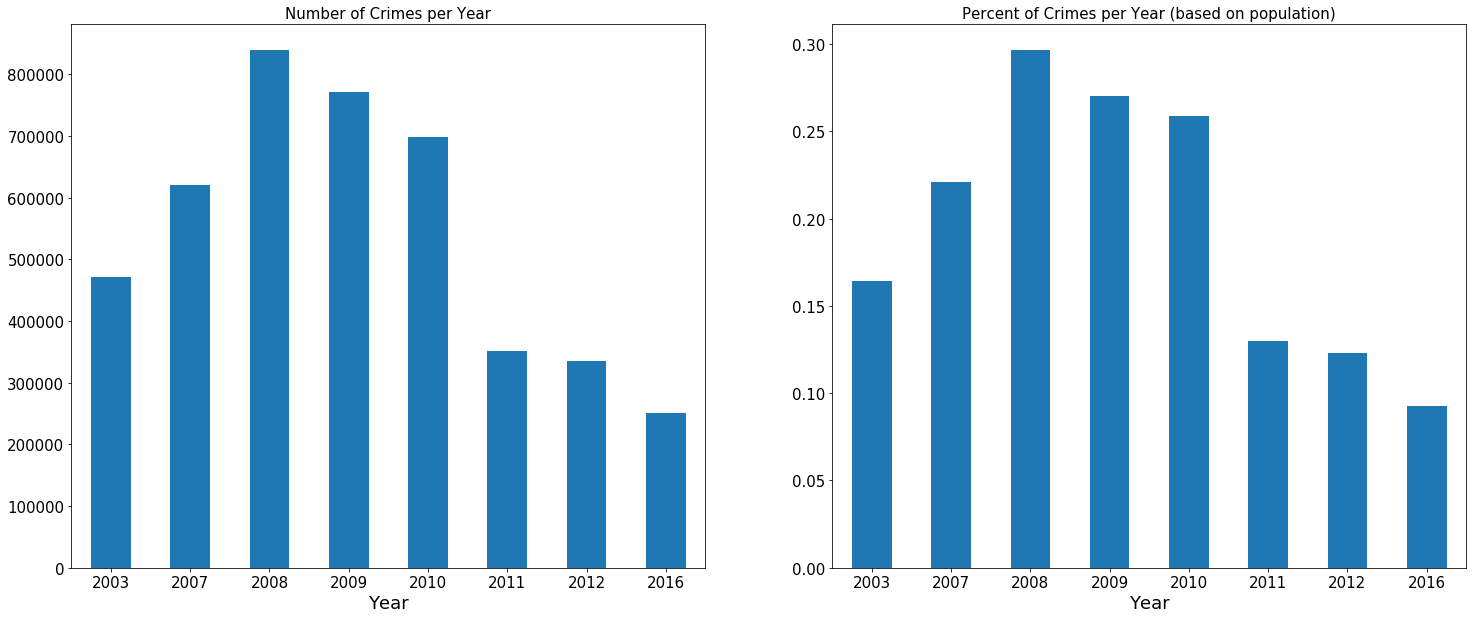

In [113]:
# Build lists for dataframe of year vs num crimes
years = []
data_len = []
for dataset in datasets_all:
    years.append(dataset.year)
    data_len.append(len(dataset))

# Create dataframe
df_num = pd.DataFrame({'Year': years,'Num Crimes': data_len}).set_index('Year')

# Join with poulation data
df_num = df_num.join(df_pop, how='outer')

# Drop rows not in year dataset
for index, row in df_num.iterrows():
    if index not in years:
        df_num.drop(index, inplace=True)

# Calculate percent crime based on population
df_num["Pct Crime"] = df_num["Num Crimes"] / df_num["Population"]

# Plot
fig, axs = plt.subplots(1,2)

df_num["Num Crimes"].plot(kind='bar', rot=0, ax=axs[0], title="Number of Crimes per Year");
df_num["Pct Crime"].plot(kind='bar', rot=0, ax=axs[1], title="Percent of Crimes per Year (based on population)");

Description: This histogram shows the number of crimes in 2003, 2007 and 2016. From the graph, 2007 has the largest number of crimes and the number in 2016 is the lowest. The number of crimes in 2003 is greater than that in 2016 but larger than in 2007. 

### Crime per community area (2003, 2007, 2016)

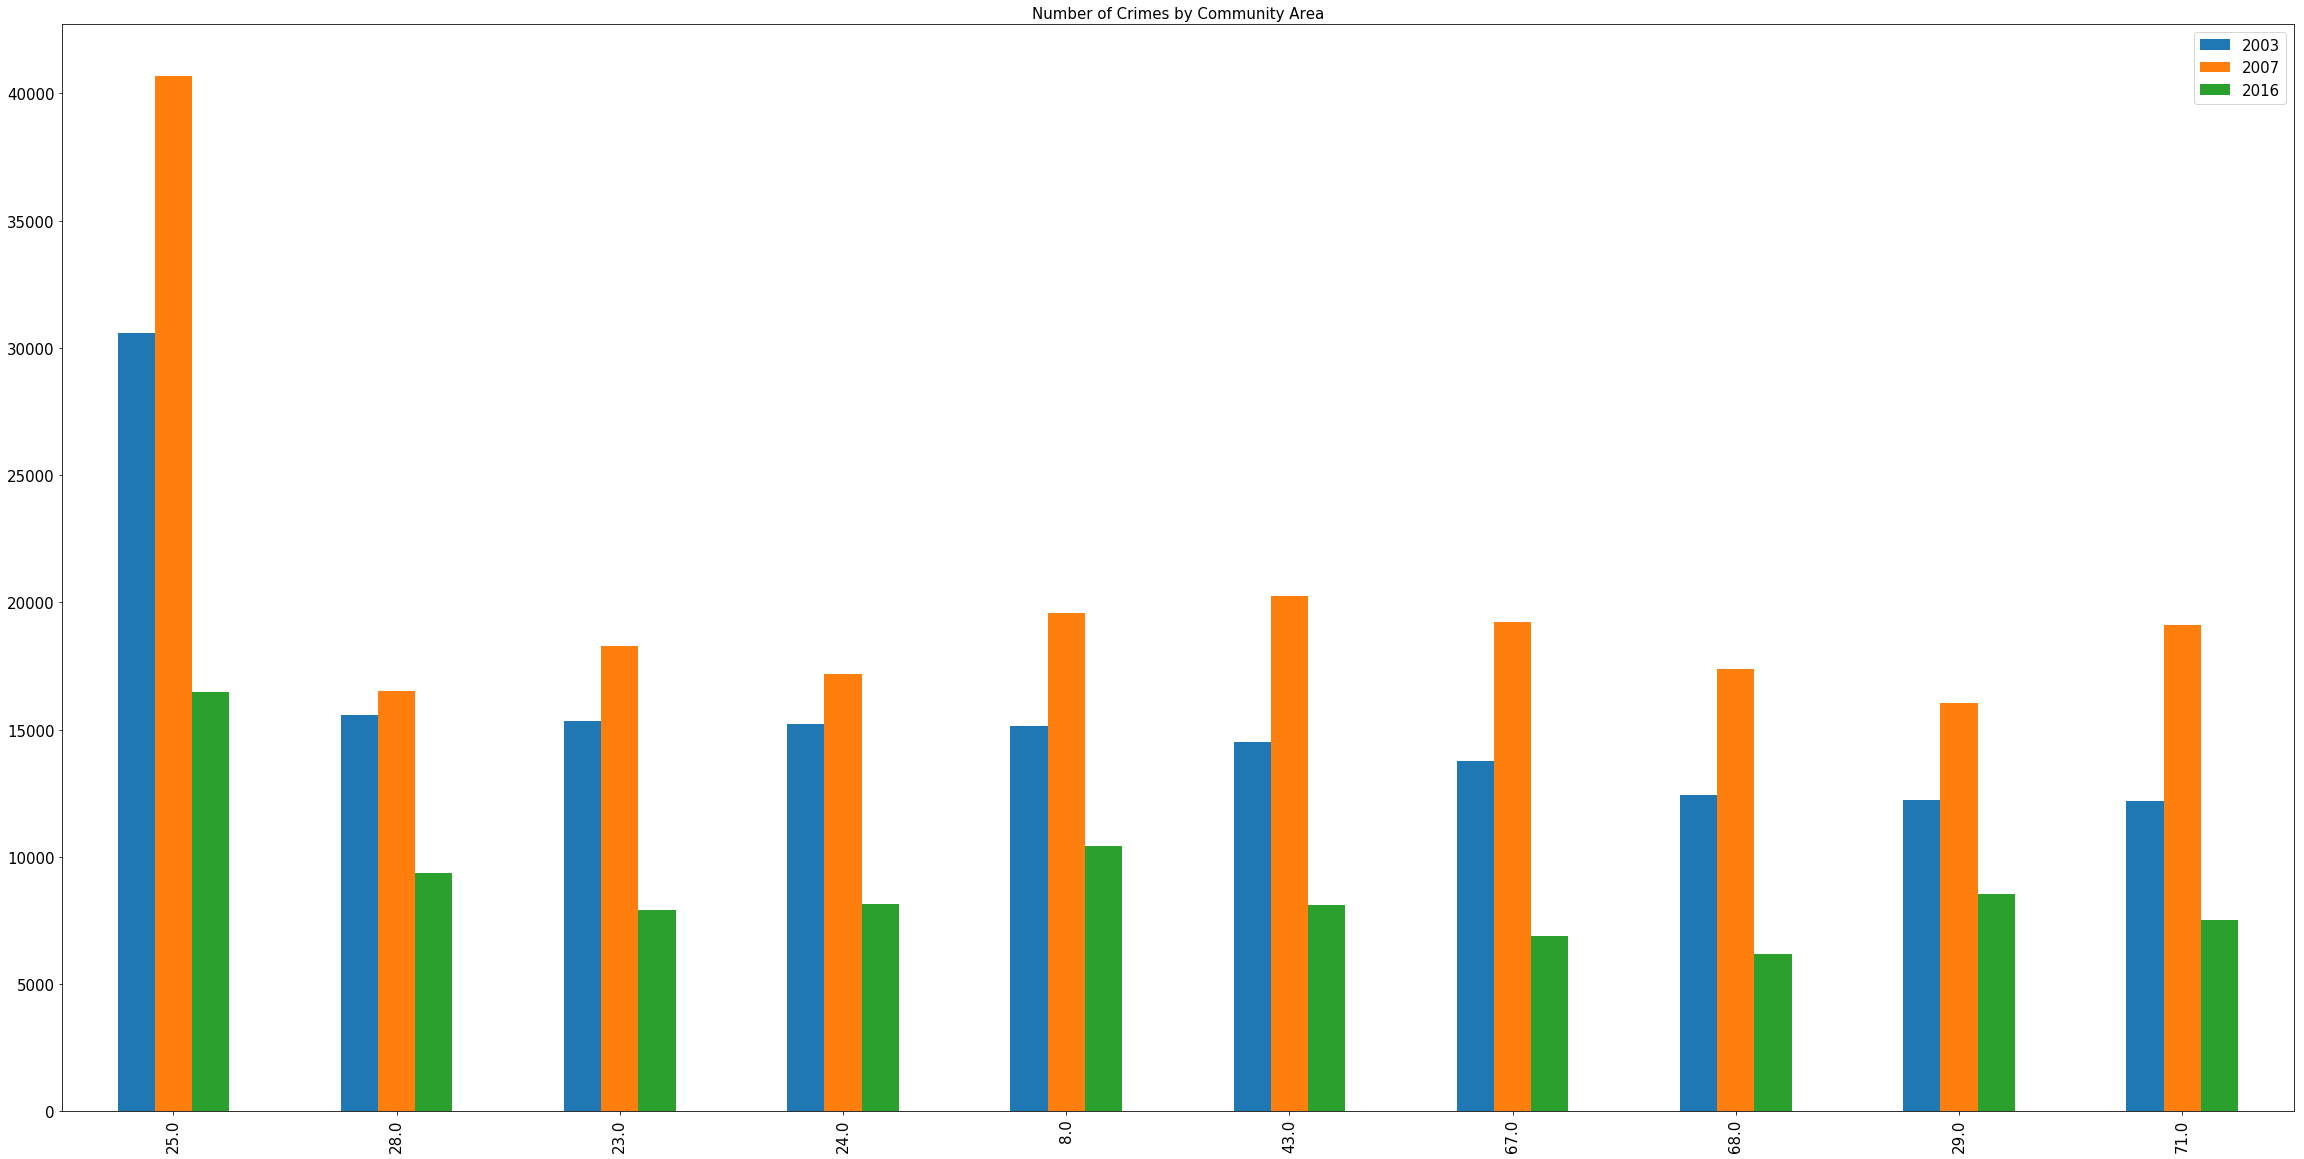

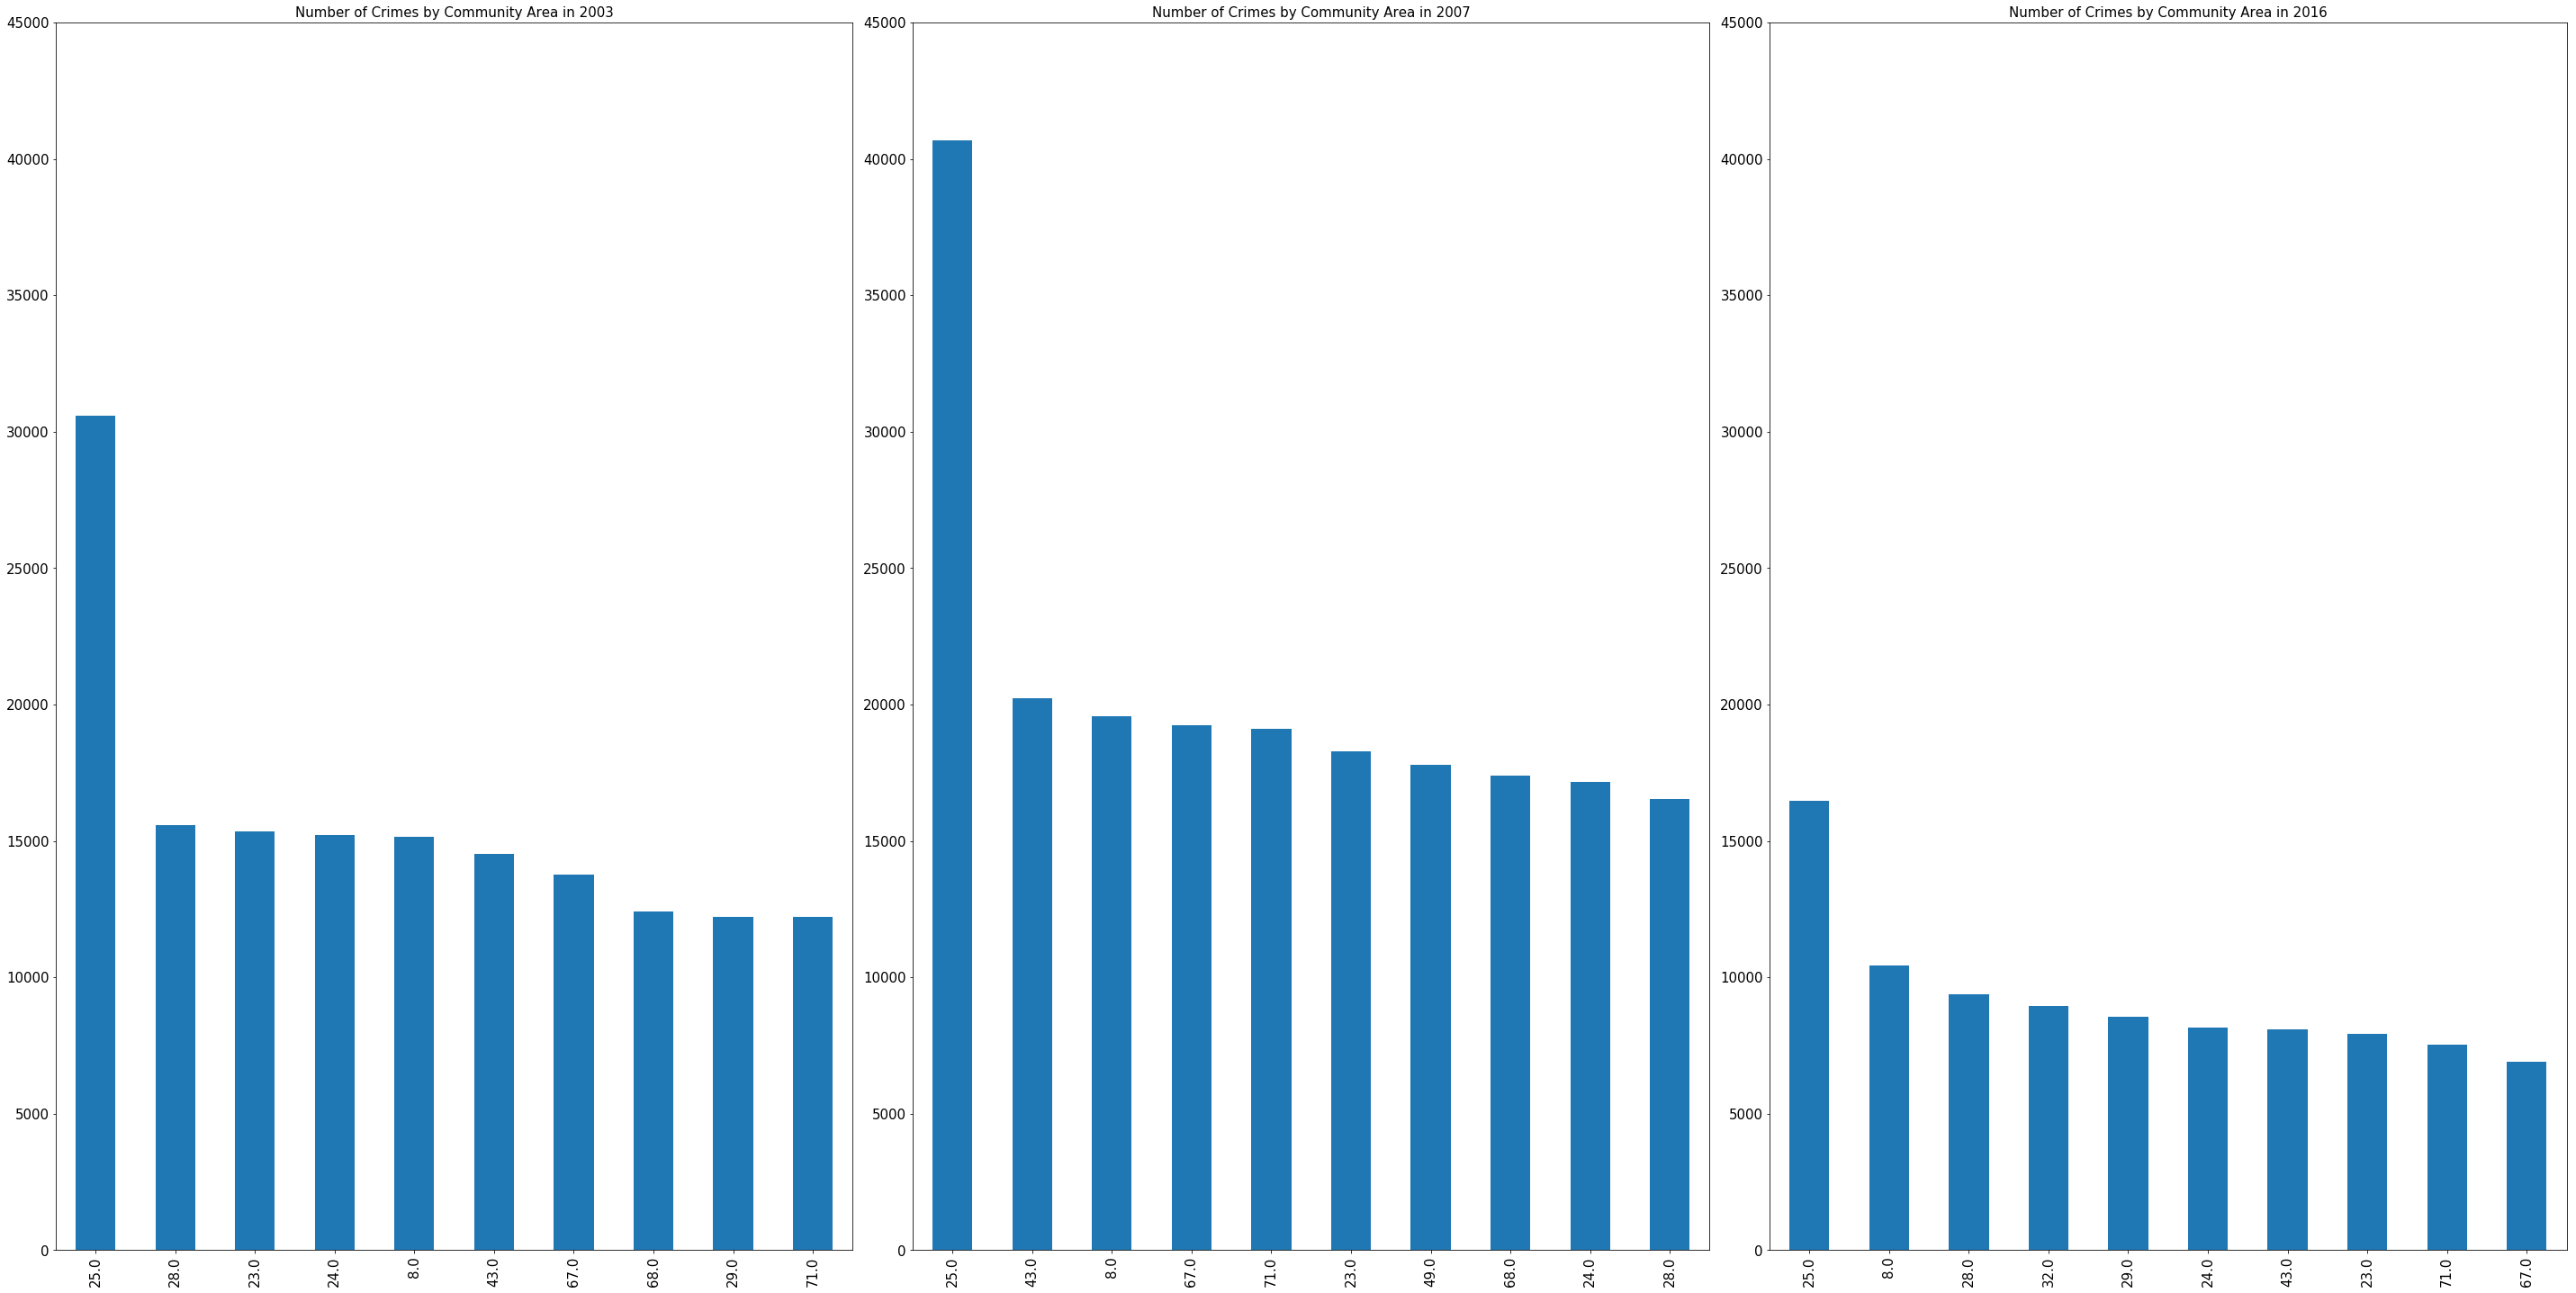

In [64]:
category = 'Community Area'

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

plt.rcParams.update({'font.size': 22})
df_areas.head(10).plot(kind='bar', rot=90, title="Number of Crimes by Community Area");

fig, axs = plt.subplots(1,3)
plt.tight_layout()

plt.rcParams.update({'font.size': 18}) # Increase font size

df_areas['2003'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Number of Crimes by Community Area in 2003").set_ylim(0, 45000);
df_areas['2007'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Number of Crimes by Community Area in 2007").set_ylim(0, 45000);
df_areas['2016'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Number of Crimes by Community Area in 2016").set_ylim(0, 45000);

Description: The graphs above show the number of crimes happened in 10 community areas in the years of 2003, 2007 and 2016. Overall, all 10 community areas had their highest numbers in 2007 and the lowest in 2016. 
The community area called 25.0 had much higher numbers of crimes than other 9 areas in these three years. The other 9 areas had similar numbers of crimes in these three years. In 2003, the areas of 29.0 and 71.0 had the lowest numbers. In 2007, area 28.0 had the lowest number. And area 67.0 had the lowest in 2016.

### Top crimes per year (2003, 2007, 2016)

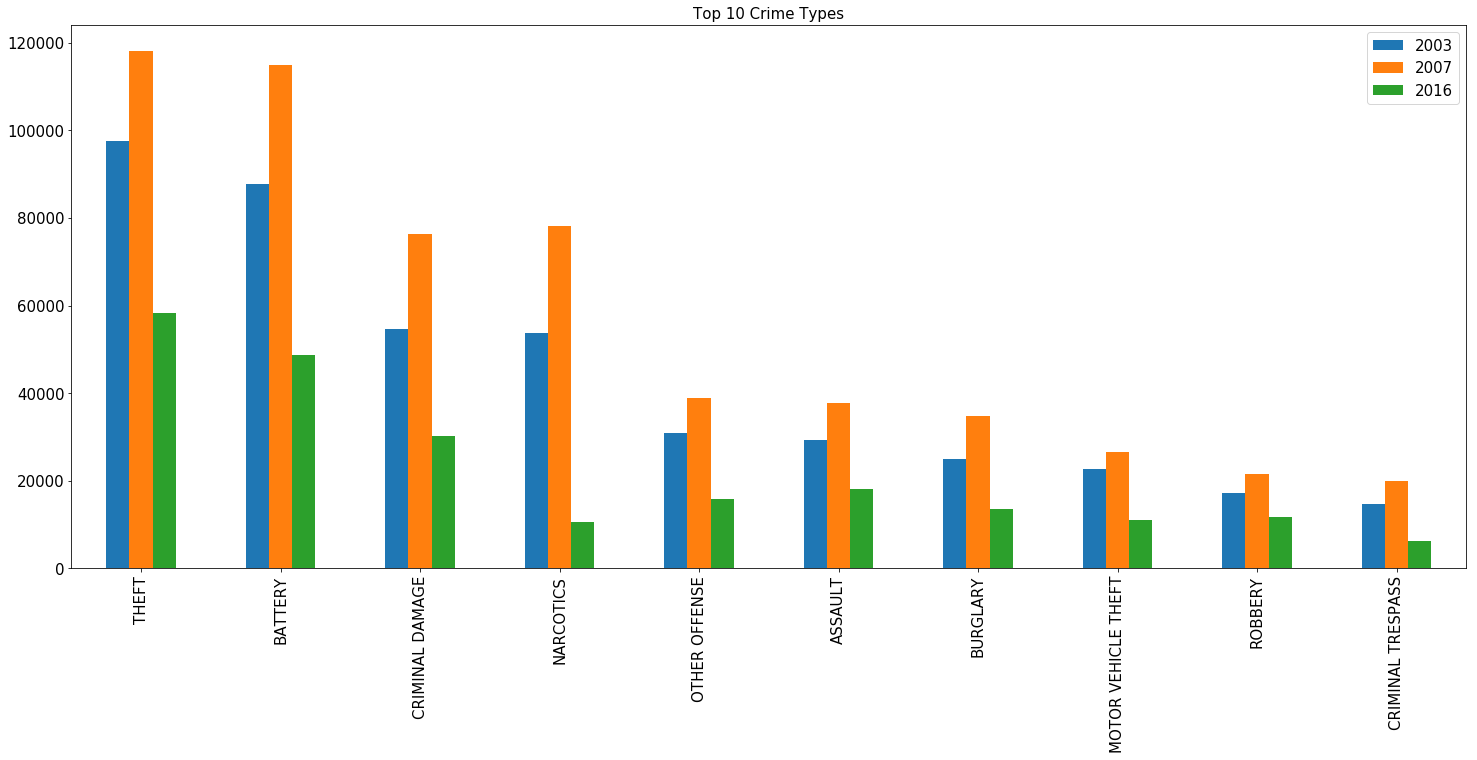

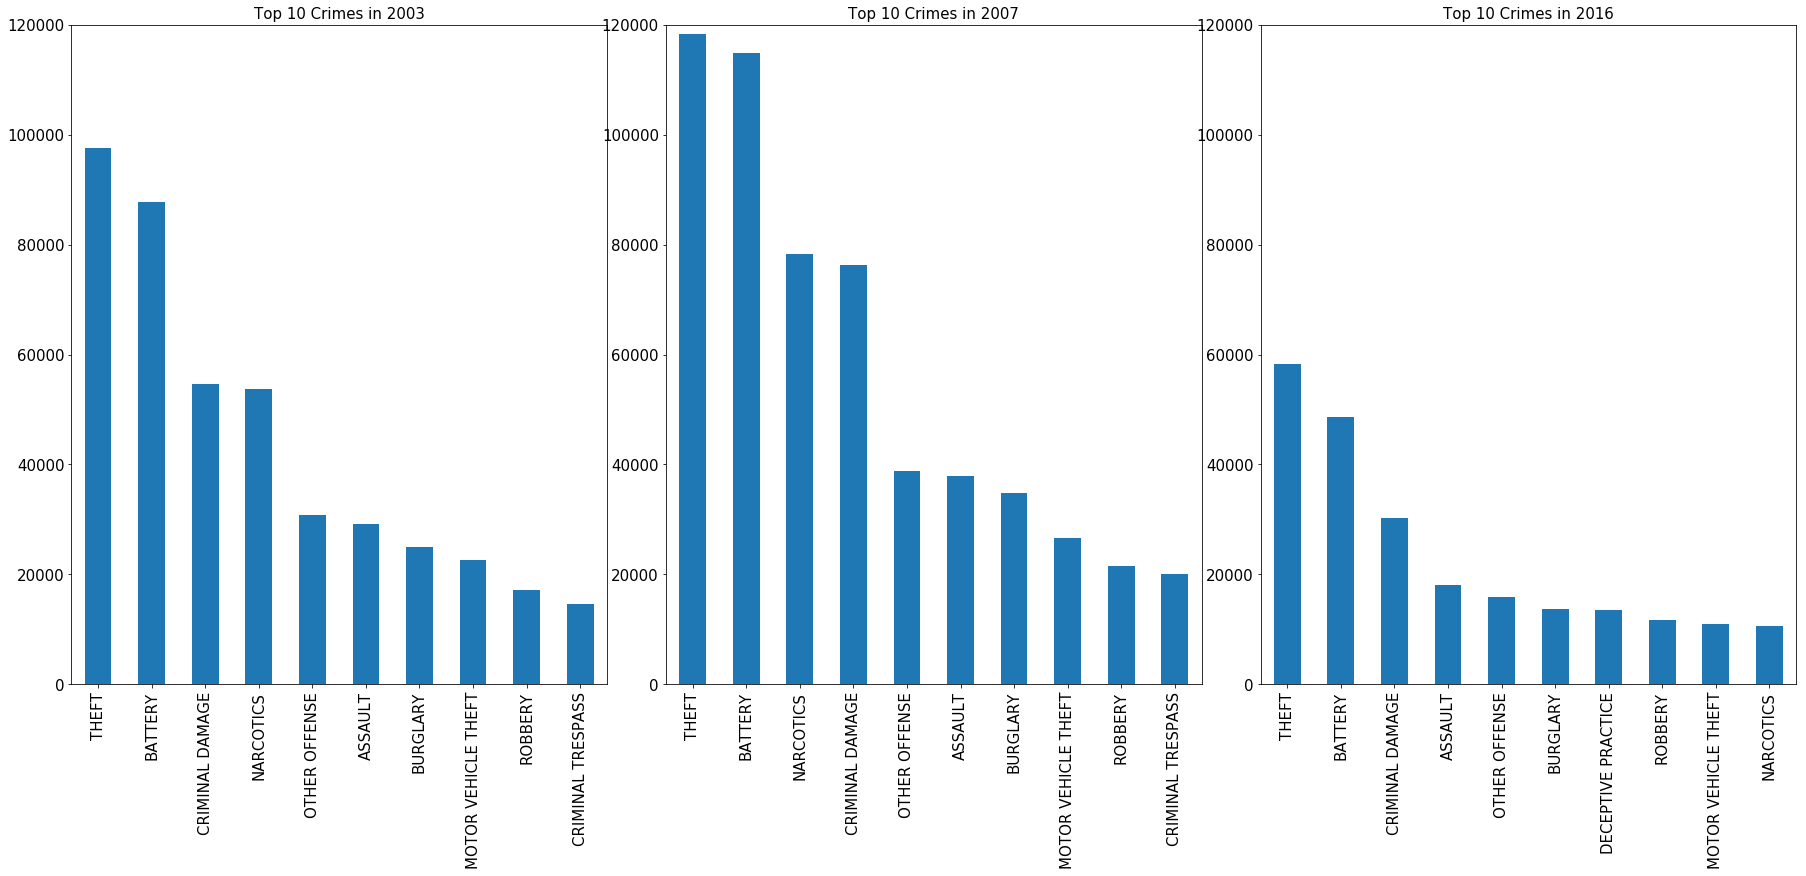

In [28]:
#%matplotlib inline

category = 'Primary Type'

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

df_areas[['2003', '2007', '2016']].head(10).plot(kind='bar', rot=90, title="Top 10 Crime Types");

fig, axs = plt.subplots(1,3)

plt.tight_layout()

df_top_2003 = df_areas['2003']
df_top_2007 = df_areas['2007']
df_top_2016 = df_areas['2016']

df_top_2003.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Top 10 Crimes in 2003").set_ylim(0, 120000);
df_top_2007.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Top 10 Crimes in 2007").set_ylim(0, 120000);
df_top_2016.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Top 10 Crimes in 2016").set_ylim(0, 120000);

Description: Thses graphs describe the numbers of the top 10 crimes happened in the years of 2003, 2007 and 2016. Theft and battery are the two most common types of crimes for all three years. Robbery and criminal trespass happened less frequently in these three years for the top 10 items. In the year 2007, all types of crimes happened most requently, and in 2016, they happened less frequently. 

## Group 2008-2012 data into one dataframe by disctrict

In [29]:
# Combine datasets
df_2008_2012 = pd.concat(datasets_by_area)

# Get count of number of crimes
df_2008_2012['Num Crimes'] = 1

# Drop unnecessary columns
df_2008_2012.drop(columns=['Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year'], axis=1, inplace=True)

# Group by community area
df_2008_2012 = df_2008_2012.groupby(['Community Area']).sum()

# Drop unnecessary first row
df_2008_2012.drop([0], inplace=True)

# Read in income data
df_income = pd.read_csv("./data/Per_Capita_Income.csv", index_col=0)
df_income.index.names = ['Community Area']

# Join Dataframes
df_2008_2012 = df_2008_2012.join(df_income, how='outer')
df_2008_2012.columns

# Rename column (to remove space)
df_2008_2012.rename(columns={"PER CAPITA INCOME ": "PER CAPITA INCOME"}, inplace=True)

## Graph crime vs income (2008-2012)

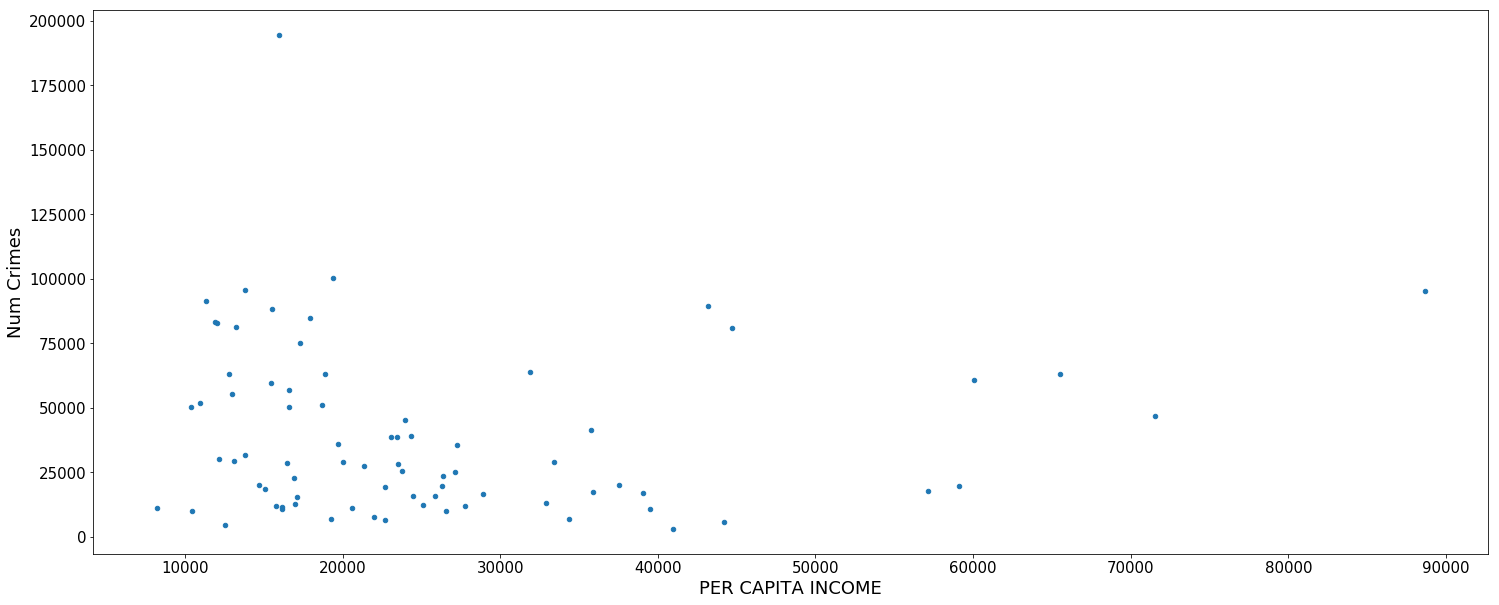

In [34]:
df_2008_2012.plot.scatter(x='PER CAPITA INCOME', y='Num Crimes');

Description: From the graph, most areas had their per capita incomes in the range of 10,000 to 40,000. Most values for crimes were in the range between 7,000 and 100,000. Regardless of the outliers, the areas with 10,000 to 20,000 per capita income had the broadest range of numbers of crimes, which was from about 7,000 to 100,000. The areas with 20,000 to 40,000 per capita income had the narrowest range of numbers of crimes, which was from about 7,000 to 50,000. From the graph, there is a rough tendency that areas with low per capita income would more likely have higher numbers of crimes than those in high-income community. 

## Top 3 Crimes per year (2003, 2007, 2016)

In [31]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

Text(0.5, 1.0, 'Top 3 Crimes in 2016')

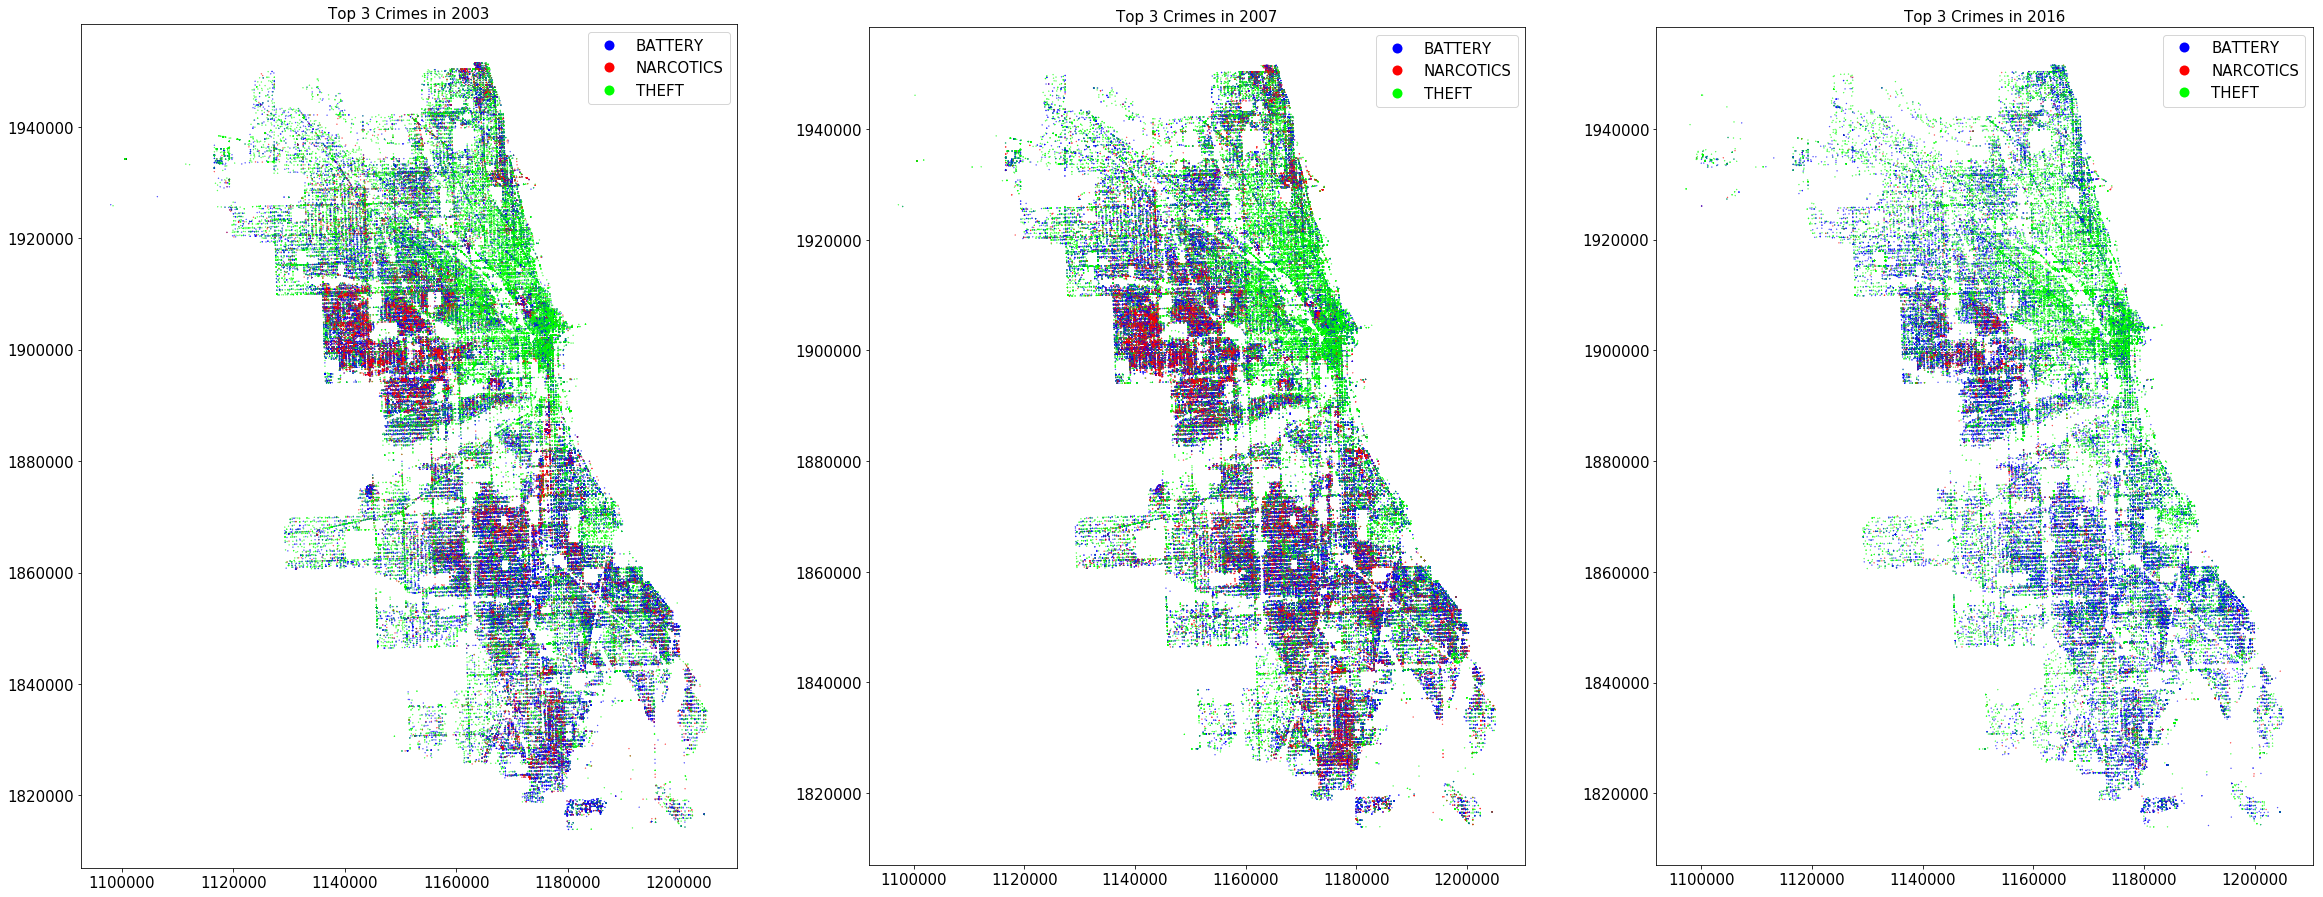

In [60]:
crs={'init':'epsg:4326'}
axs={}

# zip the Longtitude and Latitude together. Each point represents a row in Data frame
Geo_2003 = [Point(xy) for xy in zip (df_2003["X Coordinate"], df_2003["Y Coordinate"])]
Geo_2007 = [Point(xy) for xy in zip (df_2007["X Coordinate"], df_2007["Y Coordinate"])]
Geo_2016 = [Point(xy) for xy in zip (df_2016["X Coordinate"], df_2016["Y Coordinate"])]

crime_types = ["THEFT", "BATTERY", "NARCOTICS"]

Geo_df_2003 = gpd.GeoDataFrame(df_2003, crs=crs, geometry=Geo_2003)
Geo_df_2003_top_3 = Geo_df_2003[Geo_df_2003['Primary Type'].isin(crime_types)]

Geo_df_2007 = gpd.GeoDataFrame(df_2007, crs=crs, geometry=Geo_2007)
Geo_df_2007_top_3 = Geo_df_2007[Geo_df_2007['Primary Type'].isin(crime_types)]

Geo_df_2016 = gpd.GeoDataFrame(df_2016, crs=crs, geometry=Geo_2016)
Geo_df_2016_top_3 = Geo_df_2016[Geo_df_2016['Primary Type'].isin(crime_types)]

plt.rcParams['figure.figsize'] = (40, 20) #increase figure size
fig,axs = plt.subplots(1,3)
#fig, ax = plt.subplots(1, 1)

Geo_df_2003_top_3.plot(ax=axs[0],markersize=0.1, column='Primary Type', legend=True, cmap='brg')
Geo_df_2007_top_3.plot(ax=axs[1],markersize=0.1, column='Primary Type', legend=True, cmap='brg')
Geo_df_2016_top_3.plot(ax=axs[2],markersize=0.1, column='Primary Type', legend=True, cmap='brg')

#ax.set_title('Crimes happened in Chicago in 2003')
axs[0].set_title('Top 3 Crimes in 2003')
axs[1].set_title('Top 3 Crimes in 2007')
axs[2].set_title('Top 3 Crimes in 2016')

Description: From the three graphs, more crimes happened in 2003 and 2007 than in 2016. In these three years, the middle left area had the largest number of narcotics crimes than other areas, and the middle right area and the top area had the largest number of theft crimes. In these three years, battery most happened in the bottom and the middle left areas in Chicago. 